<a href="https://colab.research.google.com/github/fernanda993/hello-word/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/cassiasamp/jul-20-calculadora-imoveis/master/coleta_de_dados/dados_mercado_livre.csv'

In [ ]:
dfml = pd.read_csv(url)

In [ ]:
dfml.head()

,zona,precos,quartos,areas
0,norte,2990.0,3.0,475.0
1,norte,980000.0,2.0,55.0
2,norte,1700.0,2.0,58.0
3,norte,1350.0,NaN,28.0
4,norte,1000.0,3.0,55.0


In [ ]:
dfml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,1152.0,58433.302083,208259.538044,1000.0,1600.0,2420.0,4197.0,999000.0
quartos,1103.0,2.135086,0.895072,1.0,1.0,2.0,3.0,6.0
areas,1149.0,127.228895,354.052988,6.0,50.0,70.0,108.0,7800.0


In [ ]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1152 non-null   object 
 1   precos   1152 non-null   float64
 2   quartos  1103 non-null   float64
 3   areas    1149 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.1+ KB


In [ ]:
import matplotlib.pyplot as plt

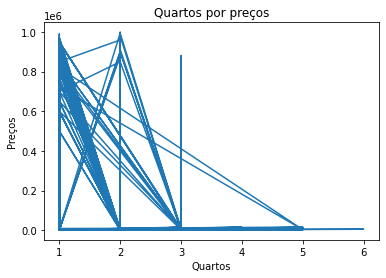

In [ ]:
plt.plot(dfml['quartos'], dfml['precos'])
plt.ylabel('Preços')
plt.xlabel('Quartos')
plt.title('Quartos por preços');

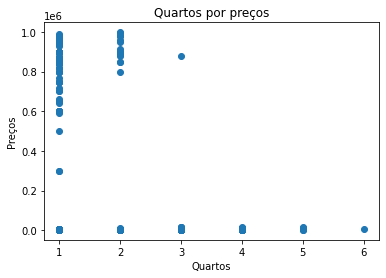

In [ ]:
# gráfico de dispersão
plt.scatter(dfml['quartos'], dfml['precos'])
plt.ylabel('Preços')
plt.xlabel('Quartos')
plt.title('Quartos por preços');

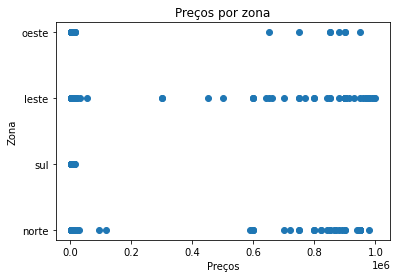

In [ ]:
plt.scatter(dfml['precos'], dfml['zona'])
plt.xlabel('Preços')
plt.ylabel('Zona')
plt.title('Preços por zona');

In [ ]:
dfml['zona']

0       norte
1       norte
2       norte
3       norte
4       norte
        ...  
1147    oeste
1148    oeste
1149    oeste
1150    oeste
1151    oeste
Name: zona, Length: 1152, dtype: object

In [ ]:
dfml['precos']

0         2990.0
1       980000.0
2         1700.0
3         1350.0
4         1000.0
          ...   
1147      2900.0
1148      1400.0
1149      1750.0
1150      2200.0
1151      1500.0
Name: precos, Length: 1152, dtype: float64

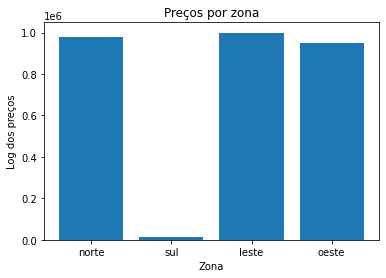

In [ ]:
plt.bar(x=dfml['zona'], height=dfml['precos'], data=dfml)
plt.xlabel('Zona')
plt.ylabel('Log dos preços')
plt.title('Preços por zona');

In [ ]:
dfml['zona'].value_counts()

norte    288
sul      288
oeste    288
leste    288
Name: zona, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


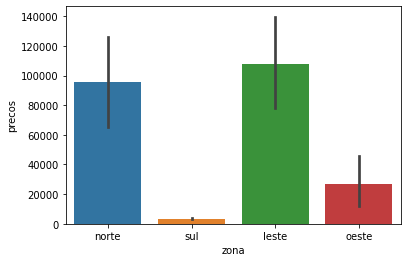

In [ ]:
sns.barplot(data=dfml, x=dfml['zona'], y=dfml['precos']);

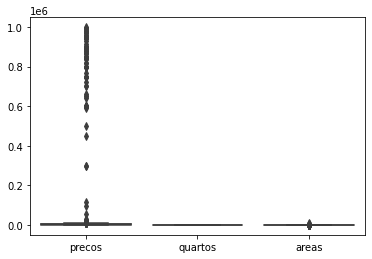

In [ ]:
sns.boxplot(data=dfml);

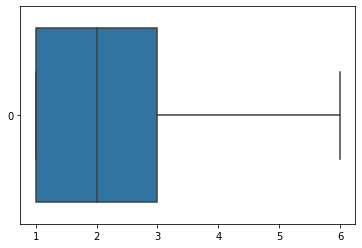

In [ ]:
sns.boxplot(data=dfml['quartos'], orient='h');

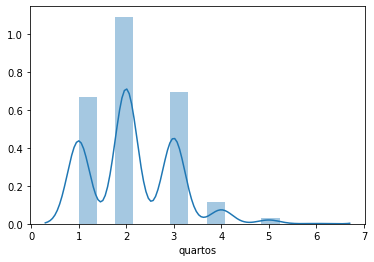

In [ ]:
sns.distplot(dfml['quartos']);

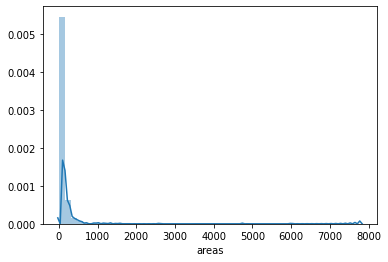

In [ ]:
sns.distplot(dfml['areas']);

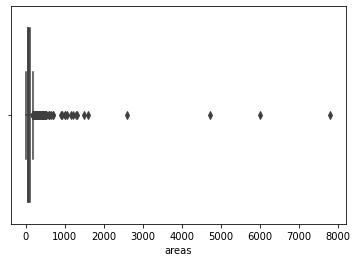

In [ ]:
sns.boxplot(dfml['areas'])

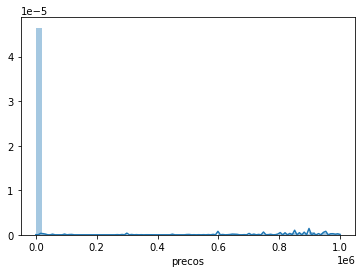

In [ ]:
sns.distplot(dfml['precos']);

Percebemos que os preços estão acumulados à esquerda do histograma e as áreas também. Entendemos que isso pode ser por causa de pontos extremos (outliers) e vamos removê-los.

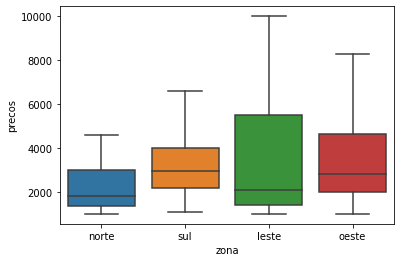

In [ ]:
sns.boxplot(x="zona", y="precos", data=dfml, showfliers=False); # usando showfliers do matplotlib

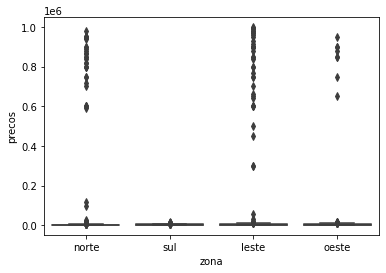

In [ ]:
sns.boxplot(x="zona", y="precos", data=dfml);

In [ ]:
dfml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,1152.0,58433.302083,208259.538044,1000.0,1600.0,2420.0,4197.0,999000.0
quartos,1103.0,2.135086,0.895072,1.0,1.0,2.0,3.0,6.0
areas,1149.0,127.228895,354.052988,6.0,50.0,70.0,108.0,7800.0


In [ ]:
# fazendo um filtro para valores até 75% dos dados em áreas
filtro_areas = dfml['areas'] < 108
filtro_precos = dfml['precos'] < 4197

In [ ]:
dfml_filtro = dfml[filtro_precos]

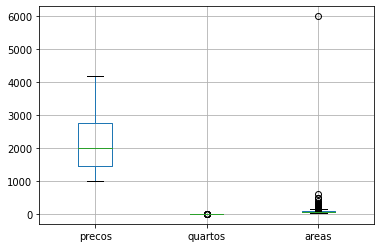

In [ ]:
dfml_filtro.boxplot();

In [ ]:
dfml[filtro_areas]

,zona,precos,quartos,areas
1,norte,980000.0,2.0,55.0
2,norte,1700.0,2.0,58.0
3,norte,1350.0,NaN,28.0
4,norte,1000.0,3.0,55.0
5,norte,1100.0,2.0,46.0
...,...,...,...,...
1147,oeste,2900.0,2.0,85.0
1148,oeste,1400.0,2.0,44.0
1149,oeste,1750.0,3.0,60.0
1150,oeste,2200.0,1.0,35.0


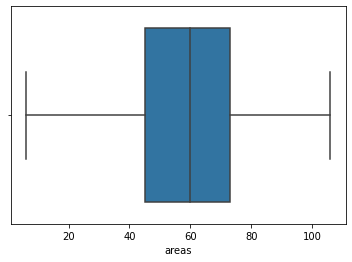

In [ ]:
sns.boxplot(dfml[filtro_areas].areas);

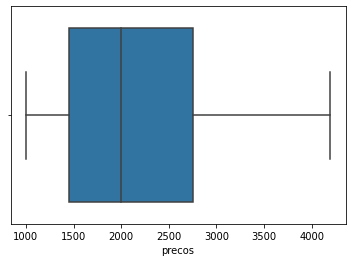

In [ ]:
sns.boxplot(dfml[filtro_precos].precos);

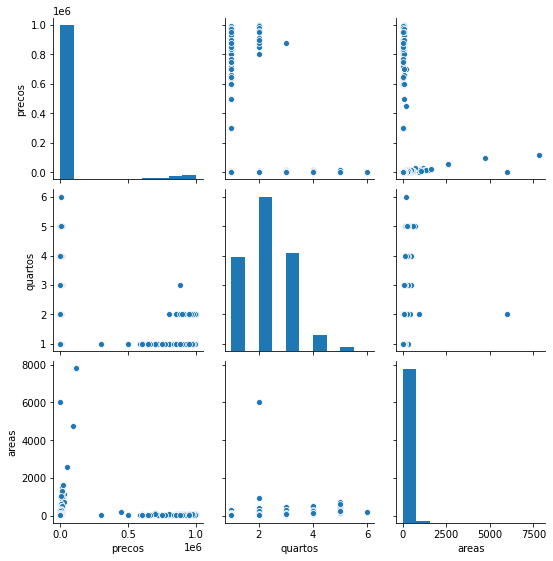

In [ ]:
sns.pairplot(dfml);

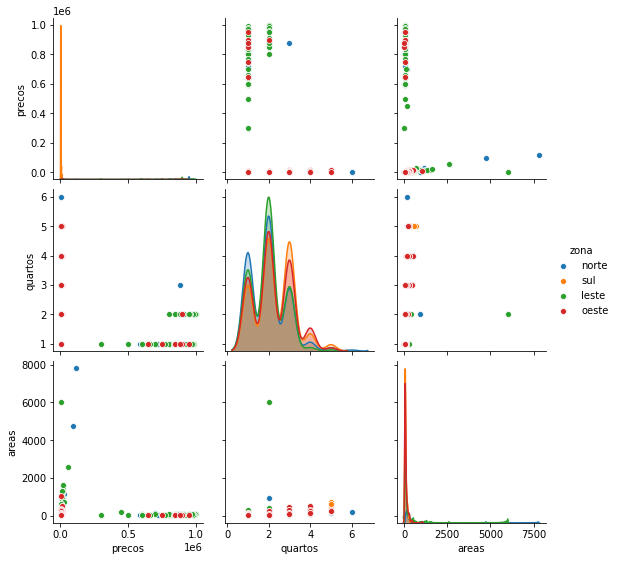

In [ ]:
sns.pairplot(dfml, hue='zona')

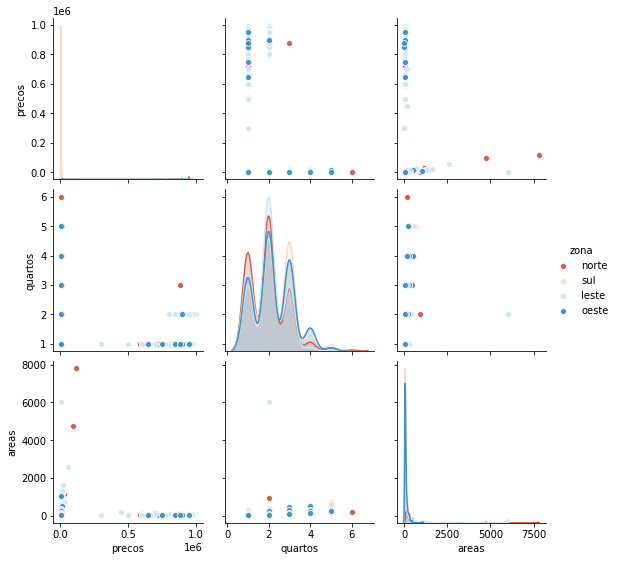

In [ ]:
sns.pairplot(dfml, hue='zona', palette='RdBu')

In [ ]:
dfml.corr()

,precos,quartos,areas
precos,1.000000,-0.263701,-0.038820
quartos,-0.263701,1.000000,0.250332
areas,-0.038820,0.250332,1.000000


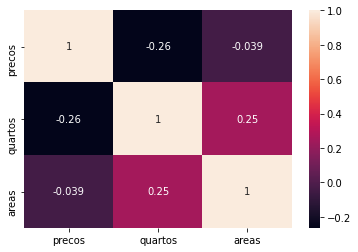

In [ ]:
sns.heatmap(dfml.corr(), annot=True);

In [ ]:
# colocar os filtros e fazer a exploração
# explorar nos dados de vocês